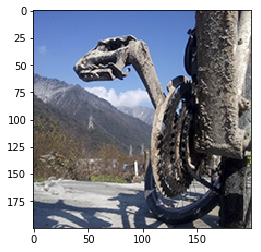

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

def show(img):
    plt.subplot()
    plt.imshow(img)
    plt.show()
    
bike=mpimg.imread('./images/bike.png')

show(bike)

input_=[bike.tolist()]

(1, 200, 200, 16) (1, 100, 100, 16)


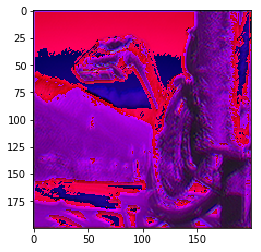

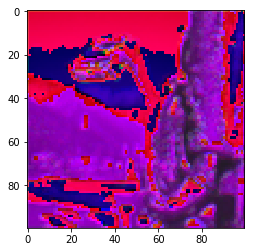

In [35]:
#卷积过程实现

import tensorflow as tf 

#!important:第二次运行需要放开这段代码，否则发送如下错误：
"""
ValueError: Variable weights already exists, disallowed. 
Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? 
"""
tf.get_variable_scope().reuse_variables()



filter_weight=tf.get_variable(
    'weights',
    
    #filter大小5X5，3被卷积图片深度，
    #16卷积后要得到的图片深度，即卷积核个数，每个卷积核卷出一个特征出来，
    #16个特征叠起来（rgb图片三个特征，也许这样容易理解些）
    [5,5,3,16],
    
    initializer=tf.truncated_normal_initializer(stddev=0.1)
)

biases=tf.get_variable(
    'biases',
    [16], #务必与卷积后得到的图片深度保持一致
    initializer=tf.constant_initializer(0.1)
)

conv=tf.nn.conv2d(
    #[batch, in_height, in_width, in_channels]
    #输入一批次图片，一个四位数组：input_[0,:,:,:]表示本批次第一张图片
    input_,
    
    filter_weight,
    strides=[1,1,1,1],
    padding='SAME'
)
"""
tf.nn.conv2d:strides参数说明

Must have `strides[0] = strides[3] = 1`.  For the most common case of the same
horizontal and vertices strides, `strides = [1, stride, stride, 1]`.
"""

bias=tf.nn.bias_add(conv,biases)

actived_conv=tf.nn.relu(bias)


#池化操作
"""
Args:
  value: A 4-D `Tensor` of the format specified by `data_format`.
  ksize: A 1-D int Tensor of 4 elements.  The size of the window for
    each dimension of the input tensor.
  strides: A 1-D int Tensor of 4 elements.  The stride of the sliding
    window for each dimension of the input tensor.
  padding: A string, either `'VALID'` or `'SAME'`. The padding algorithm.
"""
pool=tf.nn.max_pool(
    actived_conv,
    ksize=[1,3,3,1],
    strides=[1,2,2,1],
    padding='SAME'
)



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    conv_res,pool_res=sess.run([actived_conv,pool])
    print conv_res.shape,pool_res.shape
    show(conv_res[0][:,:,:3])
    show(pool_res[0][:,:,:3])